# My First Web Scraping project.
## 1.Skill demonstration
In this project I demonstrate the following skills :
1. automated web scraping  
2. data visualization   
3. basic data analysis  
4. basic Markdown syntax :p
## 2.Project Background 
This project was made on the 31st of May 2022 (the scraping was done at the same date).  
Its intended purpose was first to quickly learn the fundamentals of scraping a website for the creation of more elaborate production ready code later on during my internship at hippo labs inc under the supervision of Mr Derek Peppas.    
In this project I scraped a [whiksy online shop](https://whiskeyshop.com.ua/en/) for all of its products.   
This project is heavily inspired by a [tutorial](https://www.youtube.com/watch?v=s4jtkzHhLzY) made by [John Watson Rooney](https://www.youtube.com/@JohnWatsonRooney) who has a great channel for learning webscraping 
## 3.Project Structure
This project was created using the scrapy shell.  
The three most important files in this project are (in descending order of importance):
* whisky.json (contains the scraped data)
* whiskeyspider.py (contains the crawler / spider / automated bot that does the web scraping /automated data collection )
* project.ipynb (this notebook contains a modest data manipulation as the amount of data and richness is not that big)
* items.py (a pipeline for the items technique used in scrapy)
#### whisky.json
Contains a List of comma separated objects.  
Each of these objects represent a product / whiskey beverage  
these objects contain :  
* name (the name of the product)
* price (in Ukrainian currency _Hryvnia_ **₴**)
* link (a direct link to the product's page)
#### whiskeyspider.py 
After fetching data the parse method is automatically called by Scrapy.  
I simply provide the method with the correct selectors to get the data behind the provided DOM elements.  
Notice that in case of redirection I follow the link through using the follow method.  
#### project.ipynb 
A simple elaboration of the work that was done with some minor statistics 
#### items.py
Scrapy provides the ability to pipeline the scraped data through more logic by molding them into items before being sent to the JSON or CSV files
## 4.Statistics 
#### Number of items Scraped

In [164]:
import json
f = open('whisky.json')
data = json.load(f)
print(len(data))

164


#### Total sum of all products' prices in dollars (at the notebook writing time)

In [165]:
# might change this in the future to implement the exchange rates api but for now i will use the rate at writing time

#a numbers with , and dots to whole numbers extraction mechanism was implemented in the following loop
def totalsum():
   price=0
   for whiskyproduct in data:
      
      price +=float((whiskyproduct['price']).replace(',',''))
   return price

print("the total price of buying a single item of everykind is :",'{:,}'.format(float(totalsum()))," Hryvnia which is :",'{:,}'.format(float(totalsum())*0.027),"in dollars at the current exchange rate(24/01/2023)")# that is one happy drunkard XD
    



the total price of buying a single item of everykind is : 890,156.0  Hryvnia which is : 24,034.212 in dollars at the current exchange rate(24/01/2023)


#### Highest Priced whiskey product


In [166]:
tops=0
productname=''
link=''
for whiskyproduct in data:
    if tops< float((whiskyproduct['price']).replace(',','')):
        tops=float((whiskyproduct['price']).replace(',',''))
        productname=whiskyproduct['name']
        link =whiskyproduct['link']
print("the most expensive whisky products on the shop is :",productname," priced at :",'{:,}'.format(tops*0.027),"$ this product can be found here :",link)

the most expensive whisky products on the shop is : Macallan 25 YO  priced at : 2,363.823 $ this product can be found here : https://whiskeyshop.com.ua/en/scotch-whisky/140-macallan-25-yo.html


#### Lowest Priced whiskey product



In [167]:
min=float((data[0]['price']).replace(',',''))
productname =data[0]['name']
link=data[0]['link']
for whiskyproduct in data:
    if min> float((whiskyproduct['price']).replace(',','')):
        min=float((whiskyproduct['price']).replace(',',''))
        productname=whiskyproduct['name']
        link =whiskyproduct['link']
print("the least expensive whisky products on the shop is :",productname," priced at :",'{:,}'.format(min*0.027),"$ this product can be found here :",link)


the least expensive whisky products on the shop is : Whisky glass Amber G 100  priced at : 22.383 $ this product can be found here : https://whiskeyshop.com.ua/en/whisky-glasses/28-whisky-glass-amber-g-100.html


#### The mean price of whisky products 

In [168]:
print(' the mean price of products is :{:,}$ '.format(totalsum()/len(data)*0.027))

 the mean price of products is :146.5500731707317$ 


#### Standard Deviation products

In [169]:
def stdDev():
    s=0.0
    mean=totalsum()/len(data)
    for whiskyproduct in data:
        s+=(float((whiskyproduct['price']).replace(',',''))-mean)**2
    s/=len(data)
    return s
print(' the standard deviation in prices is :{:,}$'.format(stdDev()*0.027))

 the standard deviation in prices is :2,131,420.097650208$


##### Notice the very large standard deviation  
this is explained by the fact that 
this shop sells empty whiskey glasses for low prices and some old whiskey bottles for higher prices 
#### Top 10 Most expensive products


names: ['Macallan 25 YO', 'Bunnahabhain 28 YO', 'Speyside 44 YO', 'Springbank 20 YO', 'Springbank 18 YO', 'Bowmore 27 YO', 'Bowmore 18 YO', 'Clynelish 21 YO', 'Bowmore 20 YO', 'Ledaig 26 YO']
prices [87549.0, 49889.0, 39889.0, 29989.0, 19109.0, 18989.0, 14989.0, 14989.0, 14619.0, 14289.0]


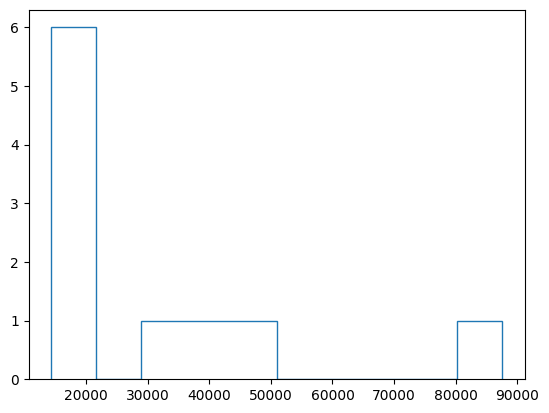

In [185]:
productsdic=dict()
for product in data:
    productsdic[product['name']]=product['price']


productslist=[]
for element in productsdic:
    productslist.append((element,productsdic[element]))

productslist = sorted(productslist, key=lambda data: float((data[1]).replace(',','')))
productslist.reverse()
topten = productslist[0:10]

import numpy as np
import matplotlib.pyplot as plt
# n_bins=20

names = [whiskyproduct[0] for whiskyproduct in topten]
prices = [float((whiskyproduct[1]).replace(',','')) for whiskyproduct in topten]
counts, bins = np.histogram(prices)
plt.stairs(counts, bins)
print("names:",names)
print("prices",prices)